In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroML.plotting import scatter_contour
from scipy.stats import norm

In [2]:
fuji_dup = pd.read_csv("fuji_tiles_duplicates.csv")

In [3]:
fuji_dup

,targetid_1,ppxf_sigma_1,ppxf_sigma_error_1,DER_SNR_1,ppxf_sigma_2,ppxf_sigma_error_2,DER_SNR_2
0,39627818572710341,118.550809,7.882341,23.361055,112.405626,18.420911,10.685783
1,39627787752964626,83.209585,4.019747,17.847512,78.254380,5.276387,14.203803
2,39627770220778858,172.229563,6.499435,16.365057,170.283655,9.300827,10.564151
3,39633158324357554,84.371402,6.289772,12.750023,69.167032,8.305208,9.635686
4,39633393184408600,105.548561,11.112886,10.313894,126.810918,18.464750,8.840349
...,...,...,...,...,...,...,...
4647,39627902962110026,146.916765,32.079216,3.146062,140.001490,33.764634,2.811326
4648,39633465880085458,99.053915,27.877952,3.006850,234.085867,116.985454,1.009998
4649,39633424658467547,82.477587,51.547470,2.327991,1000.000000,295.019477,1.455939
4650,39627811408840401,82.713035,39.067841,2.052139,80.864474,50.695708,1.532411


In [4]:
sigma_1 = fuji_dup["ppxf_sigma_1"]
err_1 = fuji_dup["ppxf_sigma_error_1"]
sigma_2 = fuji_dup["ppxf_sigma_2"]
err_2 = fuji_dup["ppxf_sigma_error_2"]
pull_pipe = (sigma_2 - sigma_1)/(np.sqrt((err_1*err_1)+(err_2*err_2)))

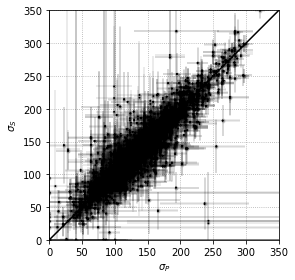

In [5]:
#figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.set_ylim(0.0,350.0)
ax.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax.errorbar(sigma_1,sigma_2,xerr=err_1,yerr=err_2,fmt=".k",alpha=0.1)
ax.scatter(sigma_1,sigma_2,color='black',edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\sigma_{P}$')
ax.set_ylabel(r'$\sigma_{S}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('sigma_P_S.png')
plt.show()

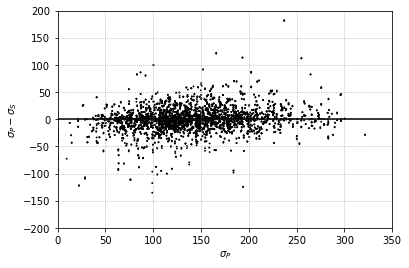

In [6]:
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.set_ylim(-200,200)
# ax.set_xlim(0.0,350.0)
#scatter_contour(sigma_1, sigma_2-sigma_1, threshold=50, log_counts=True, ax=ax,
#                histogram2d_args=dict(bins=50),
#                plot_args=dict(marker=',', linestyle='none', color='black'),
#                contour_args=dict(cmap=plt.cm.copper))
plt.ylim(-200,200)
plt.xlim(0.0,350.0)
plt.scatter(sigma_1,sigma_1-sigma_2,color='black',edgecolor='none',s=3.5)
plt.axhline(y=0.0,color="black")
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\sigma_{P}$')
plt.ylabel(r'$\sigma_{P} - \sigma_{S}$')
#plt.savefig('sigma_P_minus_S.png')
plt.show()

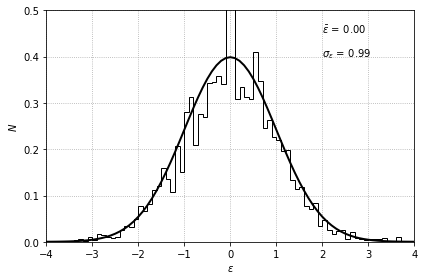

In [7]:
#plt.figure(1, figsize=(8, 6))
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe))+'$')#, fontname = 'Times New Roman',size=20)
#plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('pull-distribution_internal.pdf')
#plt.savefig('pull-distribution_internal.png')
plt.show()

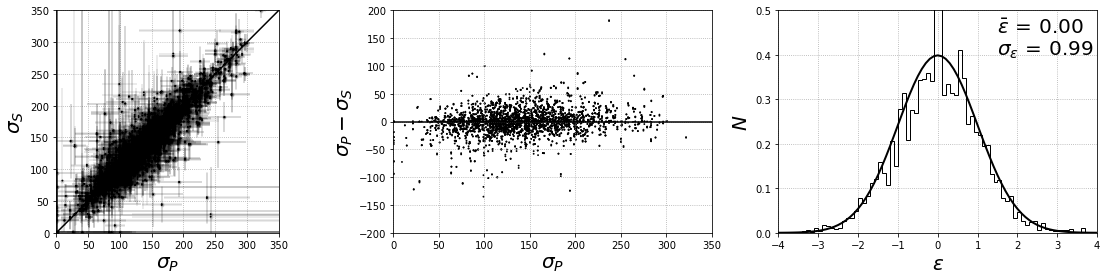

In [20]:
f_1, ((ax1, ax2, ax3)) = plt.subplots(nrows=1,ncols=3, figsize=(16, 4),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(sigma_1,sigma_2,xerr=err_1,yerr=err_2,fmt=".k",alpha=0.1)
ax1.scatter(sigma_1,sigma_2,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.grid(b=True, which='both', color='0.65',linestyle=':')
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{P}$',size=20)
ax1.set_ylabel(r'$\sigma_{S}$',size=20)

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(sigma_1,sigma_1-sigma_2,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\sigma_{P}$',size=20)
ax2.set_ylabel(r'$\sigma_{P} - \sigma_{S}$',size=20)
#ax2.set_aspect(1)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon$',size=20)
ax3.set_ylabel(r'$N$',size=20)
ax3.text(1.5,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe))+'$',size=20)#, fontname = 'Times New Roman',size=20)
ax3.text(1.5,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe))+'$',size=20)

plt.tight_layout()
plt.savefig('internal_consistency.png')
plt.show()